In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import json
import os
import sys
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
sys.path.insert(0, os.path.abspath('../src/'))
import torch
%matplotlib inline
from DataLoader import ImagesetDataset
from utils import getImageSetDirectories, imsetshow

In [ ]:
dev = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
print(f'Using {dev}')

---

In [ ]:
train_set_directories = getImageSetDirectories("../data/train")

config = json.load(open('../config/config.json'))
config['training']['create_patches'] = False

train_dataset = ImagesetDataset(imset_dir=train_set_directories, config=config['training'], top_k=0)

In [ ]:
imset = train_dataset[0]
print(imset)

In [ ]:
fig = imsetshow(train_dataset[0], k=5, show_map=False, show_histogram=False)
fig = imsetshow(train_dataset[1], k=5, show_map=False, show_histogram=False)
fig = imsetshow(train_dataset[2], k=5, show_map=False, show_histogram=False)

In [18]:
import matplotlib.pyplot as plt

def display_image_set(imset) -> plt.Figure:
    # Adjust to 2 rows and 3 columns. Adjust figsize if needed.
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Flatten the axs array to make indexing easier
    axs = axs.flatten()

    # Display the high resolution image in the first position
    axs[0].imshow(imset["hr"])
    axs[0].set_title("HR")
    axs[0].axis('off')

    # Display the low resolution images in the remaining positions
    for i in range(5):
        axs[i + 1].imshow(imset["lr"][i])
        axs[i + 1].set_title(f"LR{i}")
        axs[i + 1].axis('off')

    plt.show()
    return fig

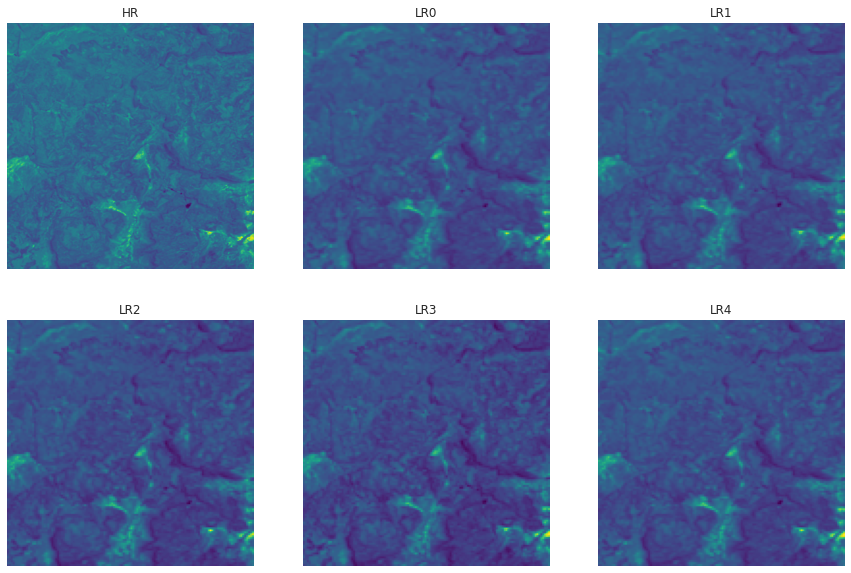

In [22]:
_ = display_image_set(train_dataset[3])